### Assignment 6 -- Clustering

#### 1st Problem Statement

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Dataset-->EastWestAirlines.csv

### Hierarchical Clustering

In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/EastWestAirlines.csv")
Dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
#To Check NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Inference: 

No NA Values Present.

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping ID# Column as it Just Unique Id for each datapoints.

#### Normalization Function

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'ID#' column as it is just unique value
rescaledX = scaler.fit_transform(Dataset.iloc[:,1:])

In [5]:
#Viewing the Normalize value
rescaledX

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

#### Using Complete Linkage -- Farthest neighbor(DataPoints)

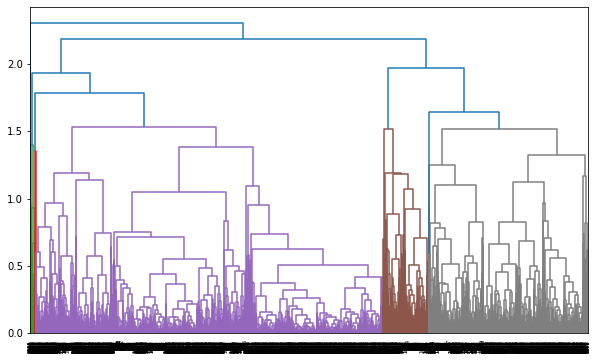

In [6]:
# create dendrogram
plt.figure(figsize = (10,6))
dendrogram = sch.dendrogram(sch.linkage(rescaledX, method='complete'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

Inference: Creating No of Clusters = 5 , using Euclidean Distance, Linkage method = complete

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(rescaledX)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [9]:
#Appending the original Dataset with Clusters
Final = pd.concat([Dataset,Clusters], axis = 1)
Final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#### Cluster Profile

In [10]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==1))

[array([   4,   11,   15,   16,   20,   35,   41,   52,   78,   79,   85,
          92,   94,  100,  105,  108,  109,  121,  122,  125,  126,  127,
         129,  137,  147,  150,  151,  154,  158,  161,  163,  167,  168,
         169,  170,  175,  186,  190,  191,  192,  196,  199,  200,  203,
         206,  210,  220,  221,  227,  231,  238,  244,  245,  248,  259,
         268,  269,  271,  272,  279,  281,  284,  285,  286,  288,  290,
         291,  292,  296,  298,  302,  305,  311,  312,  313,  322,  327,
         328,  330,  334,  340,  345,  362,  369,  372,  380,  384,  387,
         404,  405,  410,  412,  413,  423,  424,  425,  427,  437,  438,
         450,  453,  458,  465,  466,  467,  472,  478,  486,  492,  499,
         505,  510,  512,  517,  526,  527,  528,  531,  532,  534,  537,
         546,  547,  564,  567,  574,  576,  598,  599,  602,  615,  619,
         620,  623,  624,  627,  629,  630,  639,  653,  662,  664,  669,
         670,  685,  687,  692,  702, 

##### Inference: Gives the List of Data Belonging to 3 Cluster

In [11]:
#Profile
Final.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2169.576353,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


Inference: Cluster 1 has the best Passengers as they have the highest mean for most features which indicates they have the board the most flight and also have the most Transactions

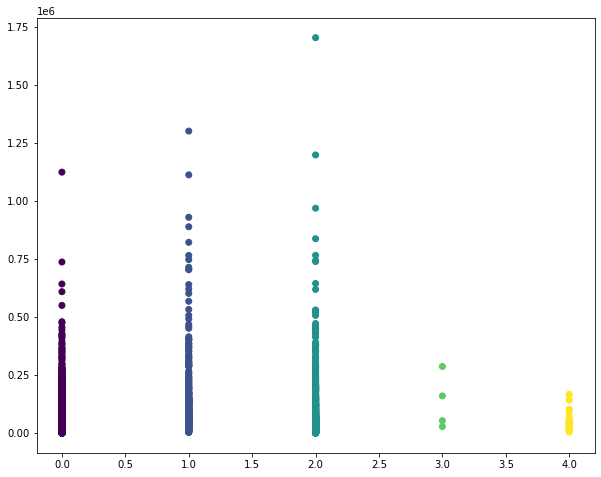

In [12]:
#Plot of Clusters
plt.figure(figsize = (10,8))
plt.scatter(Final['Clusters'],Final['Balance'], c = hc.labels_)

#### Inference of Hierarchical Clustering

In Hierarchical Clustering Used Complete Linkage and Created 5 Clusters, Most Datapoints comes in the Third cluster i.e 2th Cluster

### K-Means Clustering

In [13]:
#import K-means clustering libraries
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [14]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/EastWestAirlines.csv")
Dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Inference: 

No NA Values Present.

Standardization/Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping ID# Column as it Just Unique Id for each datapoints.

In [15]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the ID# column as it is categorial
scaled_df = scaler.fit_transform(Dataset.iloc[:,1:])

#### Elbow Graph / scree plot
How to find optimum number of  cluster

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

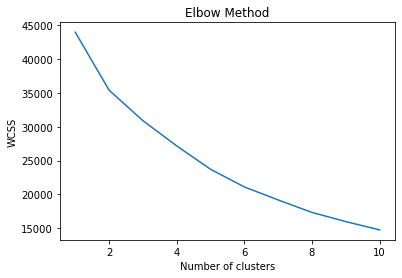

In [16]:
#wcss- within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42) # will start at 42(randam_state)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

#Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Inference: the optimum value of K would be 2 it can been through figure

In [17]:
wcss_dataframe = pd.DataFrame(wcss, columns=["wcss value"])
wcss_dataframe

,wcss value
0,43989.000000
1,35409.516630
2,30899.216409
3,27162.166106
4,23707.163885
5,21089.756870
6,19166.389044
7,17316.725861
8,15960.406001
9,14732.229882


inference: As it can be seen after first Partition within cluster sum of square i.e. variabilty decrease Drastically after that third or fourth parition it decrease very less so we can consider 2 as k value

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

Inference: K = 2 i.e no of clusters = 2

In [19]:
#Fetching the cluster by its labels
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1])

#### The Cluster Profiling

In [20]:
#Assign clusters to the data set
Dataset['clusterid_new'] = clusters_new.labels_
Dataset

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [21]:
#Profile --by Clusters & mean
Dataset.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1573.023041,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,1,2228.100482,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897


Inference: Cluster 0 has the best Passengers as they have the highest mean for most features which indicates they have the board the most flight and also have the most Transactions

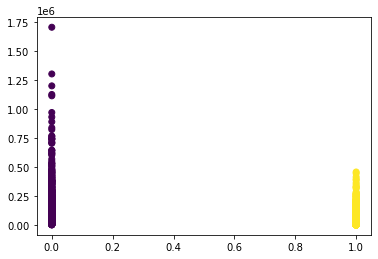

In [22]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Dataset['clusterid_new'],Dataset['Balance'], c = clusters_new.labels_)

inference: Most Datapoints comes in Cluster 0

### DB Scan Clustering

In [23]:
#Loading the Required libraries
from sklearn.cluster import DBSCAN  # for DBScan

In [24]:
#Loading the Dataset
df = pd.read_csv("C:/Users/Akaash/Downloads/EastWestAirlines.csv");
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Inference: 

No NA Values Present.

Standardization/Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping 1st Column as it is object/string dtype.

In [25]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 1st column as it is categorial
scaled_df = scaler.fit_transform(df.iloc[:,1:])

#### Building the DBScan Algorithms

for optimal value of eps: change eps if outliers are not between the industry standard noise/outliers i.e. betwwen 1% to 30%,

for optimal min_plt = D+1 where D = No of Columns

In [26]:
#Building the DBScan Algorithms
dbscan = DBSCAN(eps=3, min_samples=12)
dbscan.fit(scaled_df)

DBSCAN(eps=3, min_samples=12)

Inference:eps is the epsilon and min_samples is the min_pts parameter

In [27]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#Creating a DataFrame of these Cluster Value
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,0
2,0
3,0
4,0


#### The Cluster Profiling

In [29]:
#Appending cl Dataframe to the original Dataset
final = pd.concat([df,cl],axis =1)
final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


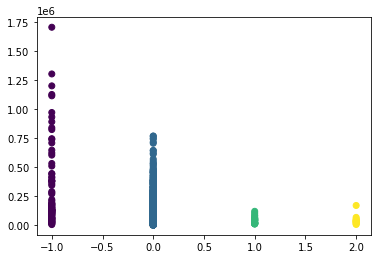

In [30]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(final['cluster'],final['Balance'], c = dbscan.labels_)

In [31]:
#List of Outliers Datapoint
list(np.where(final.cluster==-1))

[array([   8,   65,  106,  117,  126,  151,  186,  190,  220,  275,  307,
         335,  343,  380,  384,  404,  410,  420,  466,  471,  481,  488,
         510,  531,  534,  561,  589,  622,  630,  662,  681,  702,  743,
         800,  833,  850,  896,  901,  904,  958, 1036, 1177, 1188, 1220,
        1244, 1300, 1337, 1529, 1545, 1593, 1676, 1878, 1885, 1907, 1917,
        1930, 1946, 2015, 2058, 2166, 2217, 2251, 2267, 2283, 2364, 2413,
        2436, 2605, 2656, 2696, 2709, 2840, 2853, 2903, 2955, 2999, 3096,
        3146, 3235, 3338, 3463, 3583, 3594, 3772, 3788, 3846, 3883],
       dtype=int64)]

Inference: The -1 values are outliers and by industry standard noise/outliers must be betwwen 1% to 30%, in this case it can be less then 30%.

In [32]:
#Profile --by Clusters & mean
final.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1529.988506,303002.206897,1991.931034,2.896552,1.08046,1.563218,64194.229885,28.758621,4369.977011,12.183908,5074.666667,0.816092
1,0,2022.757615,68779.176820,104.030976,2.050336,1.00000,1.000000,16129.909396,11.180692,374.232060,1.136035,4099.718121,0.360867
2,1,2400.600000,39187.040000,0.000000,1.120000,2.00000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000
3,2,2152.000000,41562.307692,0.000000,1.000000,3.00000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692


Inference: Cluster -1 is the Outlier